#### Importing Data
* Create a function to take an empty list, iterate over the columns and create a full list of all the column types for the dataset. Then load into agate table – make sure to clean the data if you get an error. Follow along with the example in the book on the pages listed.

In [116]:
import xlrd
import agate
import csv
from decimal import Decimal
import json
import numpy
import matplotlib.pyplot as plt

from xlrd.sheet import ctype_text

# Import the data from excel
workbook = xlrd.open_workbook('../Data/unicef/unicef_oct_2014.xls', 'rt')
workbook.nsheets
workbook.sheet_names()

# Check first row
sheet = workbook.sheets()[0]
sheet.nrows
sheet.row_values(0)

['UNICEF global databases', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [8]:
# Check all rows with data types
for r in range(sheet.nrows):
    print(r, sheet.row(r))

title_rows = zip(sheet.row_values(4), sheet.row_values(5))
title_rows

0 [text:'UNICEF global databases', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
1 [text:'Child labour', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
2 [text:'Updated November 2014', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
3 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
4 [empty:'', text:'Total (%)', empty:'', text:'Sex (%)', empty:'', text:'Place of residence (%)', empty:'', text:'Household wealth quintile (%)', empty:'', empty:'', empty:'', empty:'', text:'Reference Year', text:'Data Source']
5 [text:'Countries and areas', empty:'', empty:'', text:'Male', text:'Female', text:'Urban', text:'Rural', text:'Poorest', text:'Second', text:'Mi

In [9]:
# Check the header rows
titles = [t[0] + ' ' + t[1] for t in title_rows]
titles = [t.strip() for t in titles]
titles

['Countries and areas',
 'Total (%)',
 '',
 'Sex (%) Male',
 'Female',
 'Place of residence (%) Urban',
 'Rural',
 'Household wealth quintile (%) Poorest',
 'Second',
 'Middle',
 'Fourth',
 'Richest',
 'Reference Year',
 'Data Source']

In [10]:
# Check rows for each country
country_rows = [sheet.row_values(r) for r in range(6, 114)]
country_rows

[['Afghanistan',
  10.3,
  '',
  11.0,
  9.6,
  7.9,
  10.8,
  11.9,
  11.8,
  10.1,
  9.7,
  7.8,
  '2010-2011',
  'MICS'],
 ['Albania',
  5.1,
  'y',
  6.2,
  3.9,
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  2010.0,
  'National Child Labour Survey'],
 ['Algeria',
  4.7,
  'y',
  5.5,
  3.9,
  3.9,
  5.6,
  7.3,
  4.5,
  4.1,
  3.1,
  3.8,
  2006.0,
  'MICS'],
 ['Angola',
  23.5,
  '',
  22.1,
  24.8,
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  2001.0,
  'MICS'],
 ['Argentina',
  4.4,
  '',
  4.8,
  3.9,
  '-',
  '-',
  6.8,
  3.9,
  3.3,
  3.7,
  3.1,
  '2011/2012',
  'MICS'],
 ['Armenia',
  3.9,
  '',
  4.7,
  2.9,
  2.4,
  6.0,
  6.9,
  4.1,
  3.2,
  2.4,
  2.4,
  2010.0,
  'ARM_DHS _2010'],
 ['Azerbaijan',
  6.5,
  'y',
  7.5,
  5.4,
  2.1,
  10.7,
  '-',
  '-',
  '-',
  '-',
  '-',
  2005.0,
  'Dayioglu, Meltem. 2007. Working children in Azerbaijan: An analysis of the 2005 child labour and labouring children surveys. State Statistical Committee of Azerbaijan and ILO

In [68]:
# Check continent rows
continent_rows = [sheet.row_values(r) for r in range(115, 125)]
continent_rows

[['Sub-Saharan Africa',
  24.971247439998038,
  '',
  25.360921492010025,
  24.54592292310616,
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '',
  ''],
 ['Eastern and Southern Africa',
  25.260535889918042,
  '',
  26.52655776473469,
  23.914511793758958,
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '',
  ''],
 ['West and Central Africa',
  24.79921828162676,
  '',
  24.593858857812133,
  25.01060717034784,
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '',
  ''],
 ['Middle East and North Africa',
  8.908409240697537,
  '',
  10.601358130447883,
  7.139944708092362,
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '',
  ''],
 ['South Asia',
  12.367478968427415,
  '',
  12.62776670207997,
  12.00494487622905,
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '',
  ''],
 ['East Asia and Pacific',
  8.395057888152063,
  '**',
  9.517664037077507,
  7.178416066469366,
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '–',
  '',
  ''],
 ['Latin America and Caribbean',
  10.9774

In [13]:
# Check an example row
text_type = agate.Text()
number_type = agate.Number()
boolean_type = agate.Boolean()
date_type = agate.Date()

example_row = sheet.row(6)
print(example_row)
print(example_row[0].ctype)
print(example_row[0].value)
print(ctype_text)

[text:'Afghanistan', number:10.3, empty:'', number:11.0, number:9.6, number:7.9, number:10.8, number:11.9, number:11.8, number:10.1, number:9.7, number:7.8, text:'2010-2011', text:'MICS']
1
Afghanistan
{0: 'empty', 1: 'text', 2: 'number', 3: 'xldate', 4: 'bool', 5: 'error', 6: 'blank'}


In [77]:
# Check for errors in the example row
types = []

for v in example_row:
    value_type = ctype_text[v.ctype]
    if value_type == 'text':
        types.append(text_type)
    elif value_type == 'number':
        types.append(number_type)
    elif value_type == 'xldate':
        types.append(date_type)
    else:
        types.append(text_type)

types

In [17]:
# Create agate table
table = agate.Table(country_rows, titles, types)

c:\users\anirban\appdata\local\programs\python\python36-32\lib\site-packages\agate\utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".


CastError: Can not parse value "" as Decimal. Error at row 1 column Place of residence (%) Urban.

The table has a blank field when a decimal field is expected in the definition. The following function will correct that.

In [21]:
# Remove bad data (-) from the row
def remove_bad_chars(val):
    if val == '-':
        return None
    return val

cleaned_rows = []
for row in country_rows:
    cleaned_row = [remove_bad_chars(rv) for rv in row]
    cleaned_rows.append(cleaned_row)

table = agate.Table(cleaned_rows, titles, types)
table

c:\users\anirban\appdata\local\programs\python\python36-32\lib\site-packages\agate\utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".


The following code will create the cleaned and formatted table.

In [22]:
def get_new_array(old_array, function_to_clean):
    new_arr = []
    for row in old_array:
        cleaned_row = [function_to_clean(rv) for rv in row]
        new_arr.append(cleaned_row)
    return new_arr

cleaned_rows = get_new_array(country_rows, remove_bad_chars)

table = agate.Table(cleaned_rows, titles, types)
# Print the data in tabular format
table.print_table(max_columns=7)
# Print the column names
table.column_names

| Countries and areas  | Total (%) | c | Sex (%) Male | Female | Place of residenc... | Rural | ... |
| -------------------- | --------- | - | ------------ | ------ | -------------------- | ----- | --- |
| Afghanistan          |      10.3 |   |         11.0 |    9.6 |                  7.9 |  10.8 | ... |
| Albania              |       5.1 | y |          6.2 |    3.9 |                      |       | ... |
| Algeria              |       4.7 | y |          5.5 |    3.9 |                  3.9 |   5.6 | ... |
| Angola               |      23.5 |   |         22.1 |   24.8 |                      |       | ... |
| Argentina            |       4.4 |   |          4.8 |    3.9 |                      |       | ... |
| Armenia              |       3.9 |   |          4.7 |    2.9 |                  2.4 |   6.0 | ... |
| Azerbaijan           |       6.5 | y |          7.5 |    5.4 |                  2.1 |  10.7 | ... |
| Bahrain              |       4.6 |   |          6.3 |    3.0 |                  

c:\users\anirban\appdata\local\programs\python\python36-32\lib\site-packages\agate\utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".


('Countries and areas',
 'Total (%)',
 'c',
 'Sex (%) Male',
 'Female',
 'Place of residence (%) Urban',
 'Rural',
 'Household wealth quintile (%) Poorest',
 'Second',
 'Middle',
 'Fourth',
 'Richest',
 'Reference Year',
 'Data Source')

#### Exploring Table Functions
* Which countries have the highest rates of child labor?
* Which countries have the most girls working?
* What is the average percentage of child labor in cities?
* Find a row with more than 50% of rural child labor.
* Rank the worst offenders in terms of child labor percentages by country.
* Calculate the percentage of children not involved in child labor.

#### Which countries have the highest rates of child labor?

In [35]:
# Find the top 10 countries where the child labor rate is highest
highest_child_labor = table.order_by('Total (%)', reverse=True).limit(10)

for r in highest_child_labor.rows:
    #print('Country and % of Child Labor: ' + r[0],r[1])
    print('{}: {}%'.format(r['Countries and areas'], r['Total (%)']))

Somalia: 49.0%
Cameroon: 41.7%
Zambia: 40.6%
Burkina Faso: 39.2%
Guinea-Bissau: 38.0%
Ghana: 33.9%
Nepal: 33.9%
Peru: 33.5%
Niger: 30.5%
Central African Republic: 28.5%


#### Which countries have the most girls working?

In [34]:
# Find the top 10 countries with the most female workers
most_female = table.order_by('Female', reverse = True).limit(10)

for r in most_female.rows:
    print('{}: {}%'.format(r['Countries and areas'], r['Female']))

Cabo Verde: None%
Chile: None%
Ecuador: None%
Somalia: 53.6%
Cameroon: 40.2%
Zambia: 39.5%
Nepal: 37.8%
Guinea-Bissau: 36.4%
Peru: 36.3%
Burkina Faso: 36.0%


The first 3 rows has `None%`. They should be excluded from the result.

In [36]:
# Find the top 10 countries with the most female workers
most_female = table.where(lambda r:rprint('{}: {}%'.format(r['Countries and areas'], r['Female']))['Female'] is not None).order_by('Female', reverse = True).limit(10)

for r in most_female.rows:
    

Somalia: 53.6%
Cameroon: 40.2%
Zambia: 39.5%
Nepal: 37.8%
Guinea-Bissau: 36.4%
Peru: 36.3%
Burkina Faso: 36.0%
Ghana: 34.0%
Rwanda: 30.4%
Niger: 30.1%


#### What is the average percentage of child labor in cities?

In [45]:
urban_labor = table.where(lambda r:r['Place of residence (%) Urban'] is not None)
mean_urban_labor = urban_labor.aggregate(agate.Mean('Place of residence (%) Urban'))

print('Average % of child labor in cities: ', mean_urban_labor)

Average % of child labor in cities:  10.41204819277108433734939759


#### Find a row with more than 50% of rural child labor.

In [48]:
rural_labor = table.where(lambda r:r['Rural'] is not None).find(lambda x: x['Rural'] > 50)
print('A country with more than 50% of rural child labor: ', rural_labor['Countries and areas'])

A country with more than 50% of rural child labor:  Bolivia (Plurinational State of)


#### Rank the worst offenders in terms of child labor percentages by country

In [122]:
# Add a rank column in the table based on Total %
# The higher the Total %, the lower the rank
worst_offender = table.compute([('Total Child Labor Rank', agate.Rank('Total (%)', reverse=True)), ])

# Find top 10
for r in worst_offender.order_by('Total Child Labor Rank').limit(10).rows:
    print('{}: {}% | {}'.format(r['Countries and areas'], r['Total (%)'], r['Total Child Labor Rank']))

Somalia: 49.0% | 1
Cameroon: 41.7% | 2
Zambia: 40.6% | 3
Burkina Faso: 39.2% | 4
Guinea-Bissau: 38.0% | 5
Ghana: 33.9% | 6
Nepal: 33.9% | 6
Peru: 33.5% | 8
Niger: 30.5% | 9
Central African Republic: 28.5% | 10


#### Calculate the percentage of children not involved in child labor.

For this, we have to calculate the reverse of Child labor % for each country and then find the top N countries.

In [61]:
# Function to find the reverse %
def reverse_per(row):
    return 100 - row['Total (%)']

# Create the reverse % column in the table
ranked = table.compute([('Children not working (%)',agate.Formula(number_type, reverse_per)),])

# Create the rank based on the Children not working %
ranked = ranked.compute([('Total Children not working Rank', agate.Rank('Children not working (%)', reverse=True)), ])

# Find top 10
for r in ranked.order_by('Total Children not working Rank').limit(10).rows:
    print('{}: {}% | {}'.format(r['Countries and areas'], 
                                r['Children not working (%)'], 
                                r['Total Children not working Rank']))

Trinidad and Tobago: 99.3% | 1
Romania: 99.1% | 2
Belarus: 98.6% | 3
Jordan: 98.4% | 4
Lebanon: 98.1% | 5
Tunisia: 97.9% | 6
Kazakhstan: 97.8% | 7
Ukraine: 97.6% | 8
Bhutan: 97.1% | 9
Jamaica: 96.7% | 10


#### Charting with matplotlib
* Chart the perceived corruption scores compared to the child labor percentages.
* Chart the perceived corruption scores compared to the child labor percentages using only the worst offenders.

In [102]:
# Import and examine the Corruption Perception Index data
cpi_workbook = xlrd.open_workbook('../Data/chp9/corruption_perception_index.xls','rt')
cpi_sheet = cpi_workbook.sheets()[0]

for r in range(cpi_sheet.nrows):
    print(r, cpi_sheet.row_values(r))
    
def get_types(example_row):
    types = []
    for v in example_row:
        value_type = ctype_text[v.ctype]
        if value_type == 'text':
            types.append(text_type)
        elif value_type == 'number':
            types.append(number_type)
        elif value_type == 'xldate':
            types.append(date_type)
        else:
            types.append(text_type)
    return types

def get_table(new_arr, types, titles):
    try:
        table = agate.Table(new_arr, titles, types)
        return table
    except Exception as e:
        print(e)
    
cpi_title_rows = zip(cpi_sheet.row_values(1), cpi_sheet.row_values(2))
cpi_titles = [t[0] + ' ' + t[1] for t in cpi_title_rows]
cpi_titles = [t.strip() for t in cpi_titles]
cpi_rows = [cpi_sheet.row_values(r) for r in range(3, cpi_sheet.nrows)]
cpi_types = get_types(cpi_sheet.row(3))

0 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
1 ['Country Rank', 'Country / Territory', '', '', '', 'Country Rank', 'CPI 2013 Score', 'Surveys Used', 'Standard Error', '90% Confidence interval', '', 'Scores range', '', 'Data sources', '', '', '', '', '', '', '', '', '', '', '', '']
2 ['', '', 'WB Code', 'IFS Code', 'Region', '', '', '', '', 'Lower', 'Upper', 'MIN', 'MAX', 'AFDB', 'BF (SGI)', 'BF (BTI)', 'IMD', 'ICRG', 'WB', 'WEF', 'WJP', 'EIU', 'GI', 'PERC', 'TI', 'FH']
3 [1.0, 'Denmark', 'DNK', 128.0, 'EU', 1.0, 91.0, 7.0, 2.2, 87.0, 95.0, 83.0, 98.0, 0.0, 97.0, 0.0, 96.0, 98.0, 0.0, 87.0, 89.0, 88.0, 83.0, 0.0, 0.0, 0.0]
4 [1.0, 'New Zealand', 'NZL', 196.0, 'AP', 1.0, 91.0, 7.0, 2.3, 87.0, 95.0, 83.0, 98.0, 0.0, 97.0, 0.0, 89.0, 98.0, 0.0, 96.0, 86.0, 88.0, 83.0, 0.0, 0.0, 0.0]
5 [3.0, 'Finland', 'FIN', 172.0, 'EU', 3.0, 89.0, 7.0, 1.7, 86.0, 92.0, 83.0, 98.0, 0.0, 89.0, 0.0, 89.0, 98.0, 0.0, 90.0, 87.0, 88.0, 83.0, 0.0, 0.

In [103]:
# Check and example row
example_row = cpi_sheet.row(3)
print(example_row)
print(example_row[0].ctype)
print(example_row[0].value)
print(ctype_text)

[number:1.0, text:'Denmark', text:'DNK', number:128.0, text:'EU', number:1.0, number:91.0, number:7.0, number:2.2, number:87.0, number:95.0, number:83.0, number:98.0, number:0.0, number:97.0, number:0.0, number:96.0, number:98.0, number:0.0, number:87.0, number:89.0, number:88.0, number:83.0, number:0.0, number:0.0, number:0.0]
2
1.0
{0: 'empty', 1: 'text', 2: 'number', 3: 'xldate', 4: 'bool', 5: 'error', 6: 'blank'}


In [104]:
# Create cpi table
cpi_types = get_types(cpi_sheet.row(3))
cpi_table = get_table(cpi_rows, cpi_types, cpi_titles)

c:\users\anirban\appdata\local\programs\python\python36-32\lib\site-packages\agate\utils.py:292: DuplicateColumnWarning: Column name "Country Rank" already exists in Table. Column will be renamed to "Country Rank_2".


There are 2 headers for `Country Rank`. We would rename one to `Country Rank Duplicate`.

In [105]:
cpi_titles[0] = cpi_titles[0] + ' Duplicate'
cpi_table = get_table(cpi_rows, cpi_types, cpi_titles)
cpi_table.column_names

('Country Rank Duplicate',
 'Country / Territory',
 'WB Code',
 'IFS Code',
 'Region',
 'Country Rank',
 'CPI 2013 Score',
 'Surveys Used',
 'Standard Error',
 '90% Confidence interval Lower',
 'Upper',
 'Scores range MIN',
 'MAX',
 'Data sources AFDB',
 'BF (SGI)',
 'BF (BTI)',
 'IMD',
 'ICRG',
 'WB',
 'WEF',
 'WJP',
 'EIU',
 'GI',
 'PERC',
 'TI',
 'FH')

In [109]:
# Creating data set with CPI score and child labor %
cpi_labor = table.join(cpi_table, 'Countries and areas', 'Country / Territory')

In [123]:
# Creating data set with CPI scores and child labor percentages for only the worst offenders
top_worst_offender = worst_offender.order_by('Total Child Labor Rank').limit(10)
cpi_labor_offndr = top_worst_offender.join(cpi_table, 'Countries and areas', 'Country / Territory')

#### Chart the perceived corruption scores compared to the child labor percentages

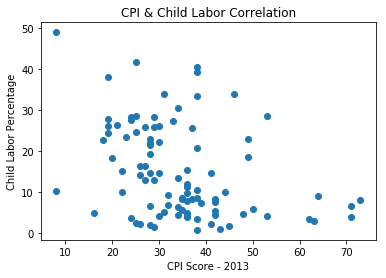

In [121]:
plt.scatter(cpi_labor.columns['CPI 2013 Score'],cpi_labor.columns['Total (%)'])
plt.xlabel('CPI Score - 2013')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation')
plt.show()



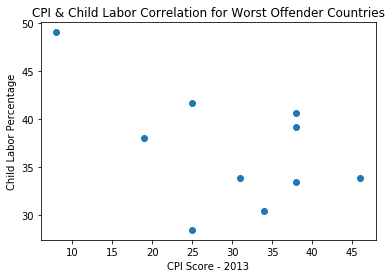

In [124]:
plt.scatter(cpi_labor_offndr.columns['CPI 2013 Score'],cpi_labor_offndr.columns['Total (%)'])
plt.xlabel('CPI Score - 2013')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation for Worst Offender Countries')
plt.show()